# 네이버 웹툰 스크래핑

* 클릭이 필요한 홈페이지는 BS4 로 스크래핑 하기가 힘들다.

# Selenium 및 웹 드라이버 설치

In [22]:
import os
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.by import By
import time

In [11]:
wd = webdriver.Chrome('chromedriver')
wd.get('https://comic.naver.com/index.nhn')

In [12]:
for title in wd.find_elements_by_class_name('title'):
    print(title.text)

컷툰
신입일기
수영만화일기
오늘의 순정망화
칼가는 소녀
닥터앤닥터 육아일기
약한영웅
하루땃따
하나리즈
낡은이 traveler
어둠의 일상툰
국밥소녀
판타지 세계에서 여행을
신과의 대화
행복을 찾다.
하드오피스
아낌없이 프러포즈[독점]
숨겨진 세계
포로롱 포롱 [독점]
평행우주[독점]
황성 절대검신 패키지 [단행본]
마황의 귀환


위에서는 우리가 원하는 전부가 나오지 않는다. 그래서 클릭을 해서 우리가 원하는 곳을 찾은후에 다시 받아 오기로 한다. 

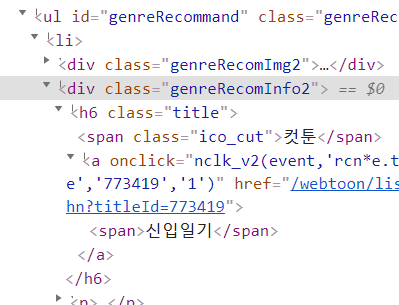

`genreRecomInfo2` tag 안에서 text를 가져오면 '컷툰'이 같이 딸려 오므로 'title' 안에서 'a' 태그 안에 있는 것만 가져 오기로 한다.  

In [24]:
wd = webdriver.Chrome('chromedriver')
wd.get('https://comic.naver.com/index.nhn')
genre_ul = wd.find_element_by_class_name('tab_gr')
genre_list = genre_ul.find_elements_by_tag_name('a')

for genre in genre_list:
    genre.click()
    time.sleep(0.5) # 클릭후 슬립 필수!!
    print("[", genre.text,"]")
    genre_rec_list = wd.find_elements_by_class_name('genreRecomInfo2')
    time.sleep(0.5)
    for genre_rec in genre_rec_list:
        title_class = genre_rec.find_element_by_class_name('title')
        title = title_class.find_element_by_tag_name('a').text
        user = genre_rec.find_element_by_class_name('user').text
        print("\t", title, "-", user)

[ 에피소드 ]
	 신입일기 - 자까
	 수영만화일기 - 해오
	 오늘의 순정망화 - 손하기
	 칼가는 소녀 - 오리
	 닥터앤닥터 육아일기 - 닥터베르
	 약한영웅 - 서패스 / 김진석
[ 옴니버스 ]
	 히어로메이커 - 빤쓰
	 중독연구소 - 김택기
	 결혼생활 그림일기 - 은꼼지
	 내일 - 라마
	 AI가 세상을 지배한다면 - POGO / HOOPA
	 굿 리스너 - 쥬드프라이데이
[ 스토리 ]
	 히어로메이커 - 빤쓰
	 중독연구소 - 김택기
	 결혼생활 그림일기 - 은꼼지
	 내일 - 라마
	 AI가 세상을 지배한다면 - POGO / HOOPA
	 굿 리스너 - 쥬드프라이데이
[ 일상 ]
	 히어로메이커 - 빤쓰
	 중독연구소 - 김택기
	 결혼생활 그림일기 - 은꼼지
	 내일 - 라마
	 AI가 세상을 지배한다면 - POGO / HOOPA
	 굿 리스너 - 쥬드프라이데이
[ 개그 ]
	 오늘의 순정망화 - 손하기
	 모죠의 일지 - 모죠
	 후덜덜덜 남극전자 - 김민혁
	 가슴털 로망스 - 갸오오
	 감자마을 - 박지독
	 주님, 악마가 되게 해주세요! - 불사 / 용가리
[ 판타지 ]
	 히어로메이커 - 빤쓰
	 라서드 - 감람
	 백호랑 - 박혬
	 앵무살수 - 김성진
	 트리거 - 고경빈
	 리턴 투 플레이어 - 인덱스,엄키 / 세혼
[ 액션 ]
	 보살님이 캐리해! - 성코 / 콩자
	 참교육 - 채용택 / 한가람
	 장씨세가 호위무사 - 조형근 / 김인호
	 살아간다 - 이행복
	 삼매경 - 이원식 / 꿀찬
	 약한영웅 - 서패스 / 김진석
[ 드라마 ]
	 와이키키 뱀파이어 - 요니요니
	 중독연구소 - 김택기
	 하루의 하루 - 김이랑
	 요리GO - HO9
	 뷰티풀 군바리 - 설이 / 윤성원
	 착한건 돈이된다 - 유성연
[ 순정 ]
	 아, 쫌 참으세요 영주님! - daybook / 새우초밥
	 유일무이 로맨스 - 두부
	 선배, 그 립스틱 바르지 마요 - 까페라떼 / JINHA
	 사랑의 헌옷수거함 - 고잉
	 또다시, 계약 부